# Problem Statement

As a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.



Data Dictionary:

‘Unnamed 0’- Index of the dataset
Email_hash- Anonymised Personal Identifiable Information (PII)
Company_hash - This represents an anonymized identifier for the company, which is the current employer of the learner.
orgyear- Employment start date
CTC- Current CTC
Job_position- Job profile in the company
CTC_updated_year: Year in which CTC got updated (Yearly increments, Promotions)
Concept Used:

Manual Clustering
Unsupervised Clustering - K- means, Hierarchical Clustering

# Library Import and Data Load

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [46]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv")
data.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [47]:
data.drop('Unnamed: 0',axis = 1, inplace=True)
data

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


# Duplicate check

In [48]:
data.value_counts()

company_hash                          email_hash                                                        orgyear  ctc      job_position            ctc_updated_year
buyvoxo rna                           bd443574985b2f72a4a382b6be392db2358158761f38de0969ee398eca7e0e26  2016.0   750000   FullStack Engineer      2020.0              2
vwwtznhqt ogrhnxgzo uqxcvnt rxbxnta   bf09ce2b61e3bba0846412cf76b2e408c92384b373f709b29c13d9254dd4ab58  2014.0   800000   Android Engineer        2019.0              2
xicxv                                 d0e72d551c69a2f9d96914515aeef797f4989b54c90ef0a985440c71cb426d2a  2014.0   1200000  FullStack Engineer      2019.0              2
avnvbtnxwv ogrhnxgzo uqxcvnt rxbxnta  15d7dd6801fb7cb980e77c420dd9bef5773e7ef57f510c90203c0d2993b74860  2016.0   1300000  Backend Engineer        2020.0              2
oguqv ontqxv                          f48d4cd35091adb89c8e82b8bc39b68416e2e954e406fde493e5bd21b13afebf  2016.0   1250000  Data Scientist          2019.0             

In [49]:
data['email_hash'].nunique()

153443

In [50]:
data['email_hash'].value_counts()

email_hash
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
                                                                    ..
bb2fe5e655ada7f7b7ac4a614db0b9c560e796bdfcaa4e5367e69eedfea93876     1
d6cdef97e759dbf1b7522babccbbbd5f164a75d1b4139e02c945958720f1ed79     1
700d1190c17aaa3f2dd9070e47a4c042ecd9205333545dbfaee0f85644d00306     1
c2a1c9e4b9f4e1ed7d889ee4560102c1e2235b2c1a0e59cea95a6fe55c658407     1
0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1f7e738a6a87d3712c31     1
Name: count, Length: 153443, dtype: int64

### Observations:
* There is duplicate rows in email_hash that means there is multiple row for each learner.

In [51]:
data.isna().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64

In [52]:
# Analysis of orgyear
data['orgyear'] = data.groupby('email_hash')['orgyear'].transform(lambda x: x.fillna(data.loc[x.index]['ctc_updated_year'].min()))
data['orgyear'] = data['orgyear'].astype(int)
data.loc[data['orgyear'].astype(str).str.len() != 4, 'orgyear'] = data['ctc_updated_year']
data.loc[data['orgyear'] > 2024, 'orgyear'] = data['ctc_updated_year']

In [53]:
data['orgyear'].value_counts()

orgyear
2018    25269
2019    23478
2017    23245
2016    23043
2015    20611
2014    16696
2020    13483
2013    12351
2012    10493
2011     7970
2010     5751
2009     3777
2021     3719
2008     2728
2007     2257
2006     2075
2005     1873
2004     1455
2003     1018
2022      911
2001      713
2002      685
2000      495
1999      340
1998      279
2023      252
1997      234
1996      134
1995       94
1991       79
1993       74
1994       65
1992       47
2024       43
1990       38
1989       22
1988       10
1986        8
1987        6
1985        5
1982        4
1984        3
1970        2
1971        1
1979        1
1977        1
1973        1
1976        1
1972        1
1981        1
1900        1
Name: count, dtype: int64

In [54]:
data['orgyear'].nunique()

51

In [55]:
# Sort the data by 'email_hash' and 'ctc_updated_year' in descending order
data = data.sort_values(['email_hash', 'ctc_updated_year'], ascending=[True, False])

# Drop duplicate 'email_hash' values, keeping only the first occurrence
data = data.drop_duplicates(subset='email_hash', keep='first')

In [56]:
data.value_counts()

company_hash      email_hash                                                        orgyear  ctc       job_position            ctc_updated_year
0000              b3f3bb98cbca4b1ce5dfd5abb4e500ce6f6b66288a5202ead573964201d24b24  2017     300000    Other                   2020.0              1
vbtqxwvz tduqtoo  738eebfb51d682716796b4035f959604e4d8dd9c276044d239c685d44b0a0a4b  2015     2600000   FullStack Engineer      2020.0              1
                  8ad9ee96c09c5da5db79c6806513586051f81838b07be495291e789259a7c4dc  2012     860000    Other                   2020.0              1
                  89862a71e2482664205f2d0867f552a75d8f4669ae51bd3e16e09388d1fc5ccd  2014     1650000   Backend Engineer        2019.0              1
                  88d72592ea0e9844dbb5cef3568891741a75f766315ea15544b6987171cb6201  2004     3200000   Engineering Leadership  2019.0              1
                                                                                                               

In [57]:
data

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
84638,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012,3500000,Backend Engineer,2019.0
506,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013,250000,Backend Engineer,2020.0
51568,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,2021,1300000,NaN,2019.0
53844,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2004,2000000,FullStack Engineer,2021.0
138229,fvrbvqn rvmo,00014d71a389170e668ba96ae8e1f9d991591acc899025...,2009,3400000,NaN,2018.0
...,...,...,...,...,...,...
39637,tqxwoogz ogenfvqt wvbuho,fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...,2004,3529999,QA Engineer,2019.0
185749,trnqvcg,fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...,2015,1600000,NaN,2018.0
148315,znn avnv srgmvr atrxctqj otqcxwto,fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...,2014,900000,Devops Engineer,2019.0
14106,zwq wgqugqvnxgz,ffff49f963e4493d8bbc7cc15365423d84a767259f7200...,2020,700000,FullStack Engineer,2020.0


In [58]:
data.isna().sum()

company_hash           37
email_hash              0
orgyear                 0
ctc                     0
job_position        33767
ctc_updated_year        0
dtype: int64

In [59]:
# Analysis of company_hash
data['company_hash'].fillna('Unknown', inplace=True)
data['company_hash'].nunique()

36339

In [60]:
# Analysis of job_position
data['job_position'].fillna('Unknown', inplace=True)
data['job_position'].nunique()

739

In [61]:
data.isna().sum()

company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

In [62]:
# Calculate year of experience with orgyear by substracting from 2024

data['year_of_exp'] = 2024 - data['orgyear']


In [63]:
data.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,year_of_exp
84638,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012,3500000,Backend Engineer,2019.0,12
506,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013,250000,Backend Engineer,2020.0,11
51568,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,2021,1300000,Unknown,2019.0,3
53844,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2004,2000000,FullStack Engineer,2021.0,20
138229,fvrbvqn rvmo,00014d71a389170e668ba96ae8e1f9d991591acc899025...,2009,3400000,Unknown,2018.0,15


In [64]:
# Manual Clustering
clusters = data.groupby(['company_hash', 'job_position', 'year_of_exp']).ngroup()
summary_stats = data.groupby(clusters)['ctc'].agg(['mean', 'median', 'max', 'min', 'count']).reset_index()
data = pd.merge(data, summary_stats, left_on=clusters, right_on='index', suffixes=('', '_summary'))

In [65]:
# Creating flags for CTC greater than department average
department_avg_ctc = data.groupby(['company_hash', 'job_position', 'year_of_exp'])['mean'].transform('mean')
data['department_flag'] = (data['ctc'] > department_avg_ctc).astype(int)

In [66]:
# Creating flags at Company & Job Position level
company_job_avg_ctc = data.groupby(['company_hash', 'job_position'])['mean'].transform('mean')
data['company_job_flag'] = (data['ctc'] > company_job_avg_ctc).astype(int)

In [67]:
# Creating flags at Company level
company_avg_ctc = data.groupby(['company_hash'])['mean'].transform('mean')
data['company_flag'] = (data['ctc'] > company_avg_ctc).astype(int)

In [68]:
data

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,year_of_exp,index,mean,median,max,min,count,department_flag,company_job_flag,company_flag
0,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012,3500000,Backend Engineer,2019.0,12,9157,3216468.75,2800000.0,16800000,53000,48,1,1,1
1,bxwqgogen,0408593482241b4fd8fd0556f12a00334679a43a2ce652...,2012,2800000,Backend Engineer,2020.0,12,9157,3216468.75,2800000.0,16800000,53000,48,0,0,0
2,bxwqgogen,055cb9db780862edd3819e422f5579438420cdcad3ac6e...,2012,2300000,Backend Engineer,2020.0,12,9157,3216468.75,2800000.0,16800000,53000,48,0,0,0
3,bxwqgogen,0769589a5e98dbf7aff33ba2f583189549dbad887475e7...,2012,1359000,Backend Engineer,2017.0,12,9157,3216468.75,2800000.0,16800000,53000,48,0,0,0
4,bxwqgogen,0cd4df92872e7276543feb0854b038ea4c6494ba412589...,2012,3500000,Backend Engineer,2020.0,12,9157,3216468.75,2800000.0,16800000,53000,48,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153438,vaatwg,fffa648871d5cd698ed19605344181ad80bb19d3cf4e99...,2014,450000,SDET,2019.0,10,64125,450000.00,450000.0,450000,450000,1,0,0,0
153439,pvqtdutqn,fffabf11a73fcc6b348819db3d0d3addd7d987930360f4...,2002,4500000,Unknown,2021.0,22,47127,4500000.00,4500000.0,4500000,4500000,1,0,0,1
153440,ihtoo wgqu,fffbf480e0003fe636e4d73543eaa472305e1a720c1fd3...,2014,640000,Unknown,2020.0,10,22789,640000.00,640000.0,640000,640000,1,0,0,0
153441,tqxwoogz ogenfvqt wvbuho,fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...,2004,3529999,QA Engineer,2019.0,20,58381,3529999.00,3529999.0,3529999,3529999,1,0,0,0


In [69]:
# Top 10 employees earning more than most of the employees in the company
tier_1 = data[data['ctc'] > data['mean']].nlargest(10, 'ctc')
tier_1

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,year_of_exp,index,mean,median,max,min,count,department_flag,company_job_flag,company_flag
29231,obvqnuqxdwgb,5b4bed51797140db4ed52018a979db1e34cee49e27b488...,2018,255555555,Unknown,2016.0,6,36995,1.289778e+08,128977777.5,255555555,2400000,2,1,1,1
168,wgszxkvzn,af7e865dba7de46700156df4317df109c89146217fd77e...,2015,200000000,Other,2020.0,9,73935,5.483293e+06,600000.0,200000000,105000,41,1,1,1
1199,nvnv wgzohrnvzwj otqcxwto,199146d59076620fa919a1b4e510303885a9b47d079243...,2017,200000000,Support Engineer,2020.0,7,34485,1.037778e+07,460000.0,200000000,280000,45,1,1,1
1225,nvnv wgzohrnvzwj otqcxwto,b2d195a3bf7aab1059a4401fa271de292e308248db6cfd...,2017,200000000,Support Engineer,2020.0,7,34485,1.037778e+07,460000.0,200000000,280000,45,1,1,1
1258,nvnv wgzohrnvzwj otqcxwto,22fa43a2a1bfc28b84acf5b7b6267bb9f8feb76ad3beeb...,2015,200000000,Unknown,2020.0,9,34516,4.556609e+06,560000.0,200000000,4500,109,1,1,1
1299,nvnv wgzohrnvzwj otqcxwto,82fbacc015757ee74efe763c3623dc751812af48c741ff...,2015,200000000,Unknown,2020.0,9,34516,4.556609e+06,560000.0,200000000,4500,109,1,1,1
2045,wgszxkvzn,d29d249144f337486a9efc90daf6659706225efc07466e...,2017,200000000,Other,2020.0,7,73933,5.675441e+06,500000.0,200000000,160000,59,1,1,1
2811,nvnv wgzohrnvzwj otqcxwto,6b779617a174319066f8c9ebe1c55740e79332c0143f2b...,2020,200000000,Unknown,2020.0,4,34511,1.915615e+06,600000.0,200000000,40000,454,1,1,1
3385,vwwtznhqt,2744c7f42fd4d492fa66cb2ba5168921c444dc8611ffa2...,2018,200000000,Unknown,2019.0,6,71467,4.543669e+06,500000.0,200000000,9000,75,1,1,1
5305,nvnv wgzohrnvzwj otqcxwto,10c67fa43291396c3f72c9ac34b99a6d9fb2c2007e6964...,2018,200000000,Unknown,2020.0,6,34513,1.464606e+06,400000.0,200000000,3300,205,1,1,1


In [70]:
# Top 10 employees of data science in Amazon / TCS etc earning more than their peers
class_1 = data[data['job_position'] == 'Data Scientist'].groupby('company_hash').apply(lambda x: x.nlargest(10, 'ctc')).nlargest(10, 'ctc')
class_1

,,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,year_of_exp,index,mean,median,max,min,count,department_flag,company_job_flag,company_flag
company_hash,,,,,,,,,,,,,,,,,
ihvaqvnxw xzoxsyno ucn rna,131503,ihvaqvnxw xzoxsyno ucn rna,bd222ea783ee372da4e0ad60fdccec0b8f37999a032025...,2015,200000000,Data Scientist,2019.0,9,22811,200000000.0,200000000.0,200000000,200000000,1,0,1,1
mqxonrtwgzt v bvyxzaqv sqghu wgbuvzj,137102,mqxonrtwgzt v bvyxzaqv sqghu wgbuvzj,cda8d723438e81185d2ee8c348870a4612eea974cdb2db...,2017,200000000,Data Scientist,2020.0,7,28151,200000000.0,200000000.0,200000000,200000000,1,0,1,1
ptnovvr qtnvxr rru,103060,ptnovvr qtnvxr rru,72ed7ced98573f71c8f95bc8b75aac4f0677e8872c6bec...,2019,199800000,Data Scientist,2020.0,5,46731,199800000.0,199800000.0,199800000,199800000,1,0,0,0
pgnvp,125822,pgnvp,ace1152ca60b6f2c62bb7c4a00bca0afd5a9bb2c297267...,1992,150000000,Data Scientist,2020.0,32,45948,150000000.0,150000000.0,150000000,150000000,1,0,0,1
myvoyjvb owyggr,147944,myvoyjvb owyggr,ee8dd42d6ea8365909147d861c7978d19f727a8075ba96...,2020,102500000,Data Scientist,2020.0,4,30362,102500000.0,102500000.0,102500000,102500000,1,0,0,0
bvzyvnnvz wgrrtst,33767,bvzyvnnvz wgrrtst,0a358600d0689dbe6c1bae2e27aeca2f248591361b6e65...,2024,100000000,Data Scientist,2021.0,0,8558,100000000.0,100000000.0,100000000,100000000,1,0,0,0
eqvhzygetq hov,67178,eqvhzygetq hov,2e1d492bc09bfe0d4cc9757a9c63a296c1527af1c8ecc8...,2021,100000000,Data Scientist,2020.0,3,14390,100000000.0,100000000.0,100000000,100000000,1,0,0,1
ntwy bvyxzaqv,99511,ntwy bvyxzaqv,6ad86d120e39db485331f9a0b2b1f15ce2a7bdaee778ab...,2021,100000000,Data Scientist,2019.0,3,33173,100000000.0,100000000.0,100000000,100000000,1,0,1,1
otre tburgjta uqgetooxgzvr,93595,otre tburgjta uqgetooxgzvr,5dd32aca5f483b8fa4d539778bb3f0a24073a93a80dd5a...,2010,100000000,Data Scientist,2020.0,14,41074,100000000.0,100000000.0,100000000,100000000,1,0,0,0


In [71]:
#  Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers
class_3 = data[(data['job_position'] == 'Data Scientist') & (data['ctc'] < data['mean'])].groupby(['company_hash']).apply(lambda x: x.nsmallest(10, 'ctc')).nsmallest(10, 'ctc')
class_3

,,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,year_of_exp,index,mean,median,max,min,count,department_flag,company_job_flag,company_flag
company_hash,,,,,,,,,,,,,,,,,
onhatzn,8913,onhatzn,bd9c04a574090e05b366a81cdb2f3f565d0c60fa8b1647...,2021,6000,Data Scientist,2019.0,3,39463,8.065000e+05,510000.0,2200000,6000,4,0,0,0
nvnv wgzohrnvzwj otqcxwto,54049,nvnv wgzohrnvzwj otqcxwto,3175d03fd4618eb293d6f5a1d13d42a0c79f68e9acaaa3...,2020,7500,Data Scientist,2020.0,4,34300,3.667857e+05,360000.0,760000,7500,7,0,0,0
vqxosrgmvr,72551,vqxosrgmvr,3675f79c7e05de96ccf189c818b84b487cb1aa3f6b80e8...,2015,8800,Data Scientist,2019.0,9,68565,5.529000e+05,552900.0,1097000,8800,2,0,0,0
sggsrt,76676,sggsrt,fb64af615420e06d46a1965f59068b34460fb3cbe70541...,2018,10000,Data Scientist,2021.0,6,52963,2.550000e+05,255000.0,500000,10000,2,0,0,0
ytfrtnn uvwpvqa tzntquqxot,56118,ytfrtnn uvwpvqa tzntquqxot,8274b3188470cd1c4914e7face490111e27f239457e62d...,2018,10000,Data Scientist,2019.0,6,87594,2.255000e+06,2255000.0,4500000,10000,2,0,0,0
ahzzyhbmj,85137,ahzzyhbmj,d32c344816921ae7be310ba7630c6e267703b2fc4e6a6c...,2016,31000,Data Scientist,2019.0,8,1179,8.727500e+05,1150000.0,1160000,31000,4,0,0,0
zvz,108951,zvz,d277c90e2b97fb51657936b66b68eee2e52bd4d8d98e1d...,2017,46500,Data Scientist,2016.0,7,93246,1.002325e+07,10023250.0,20000000,46500,2,0,0,0
tqxwoogz,126372,tqxwoogz,d8b6c25488ee764c6dbd20c56ad8dca794b6347d6448e2...,2017,49000,Data Scientist,2017.0,7,58269,1.483000e+06,2000000.0,2400000,49000,3,0,0,0
ogwxn szqvrt,74018,ogwxn szqvrt,ae4d247f28622b8d6475c16a8ae1aa92fc048f0cab908d...,2018,52000,Data Scientist,2015.0,6,37900,5.350000e+04,53500.0,55000,52000,2,0,0,0


In [72]:
# Bottom 10 employees earning less than most of the employees in the company
tier_3 = data[data['ctc'] < data['mean']].nsmallest(10, 'ctc')
tier_3

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,year_of_exp,index,mean,median,max,min,count,department_flag,company_job_flag,company_flag
59782,xzntqcxtfmxn,f2b58aeed3c074652de2cfd3c0717a5d21d6fbcf342a78...,2013,6,Unknown,2018.0,11,84779,1.000000e+01,10.0,14,6,2,0,0,0
27502,nvnv wgzohrnvzwj otqcxwto,80ba0259f9f59034c4927cf3bd38dc9ce2eb60ff18135b...,2012,600,Backend Engineer,2017.0,12,34271,4.483053e+06,685000.0,100000000,600,30,0,0,0
61763,gjg,b995d7a2ae5c6f8497762ce04dc5c04ad6ec734d70802a...,2018,600,FullStack Engineer,2021.0,6,18728,1.268956e+06,1250000.0,2100000,600,9,0,0,0
70840,zvz,9af3dca6c9d705d8d42585ccfce2627f00e1629130d14e...,2023,600,Unknown,2019.0,1,93362,2.291873e+06,2200000.0,7500000,600,11,0,0,0
14964,xb v onhatzn,4eea97c023bd58395edce18538831df9a735180f88f79d...,2020,1000,Unknown,2019.0,4,80105,1.256625e+06,830000.0,9800000,1000,56,0,0,0
28433,nvnv wgzohrnvzwj otqcxwto,8625d6d072e12dad0c5748ab010e1d0315736a359e2bb5...,2013,1000,Frontend Engineer,2021.0,11,34360,8.713750e+05,830000.0,1800000,1000,8,0,0,0
33070,zgn vuurxwvmrt vwwghzn,8d1e069a03fc437876b406b8c93bc7e07577f9836222bd...,2021,1000,Unknown,2021.0,3,90408,6.859701e+05,400000.0,9000000,1000,67,0,0,0
35239,kvrgqv sqghu,ae625c7063c1f8194deadfb28905d5dcc6f9077274a083...,2017,1000,Backend Engineer,2021.0,7,25173,2.050000e+04,20500.0,40000,1000,2,0,0,0
44910,gnytqo,f8574b672112433b60b8ca5178ccd918a3f21b1c2e27fc...,2018,1000,Other,2020.0,6,19008,5.242000e+05,600000.0,1000000,1000,5,0,0,0
46097,vwwtznhqt,f0f2005505c707dbdd2c86ca1587c26f822a004e86a8ec...,2021,1000,Unknown,2019.0,3,71464,5.019091e+05,450000.0,1000000,1000,11,0,0,0


In [73]:
# Top 10 companies based on their CTC
top_10_companies = data.groupby('company_hash')['mean'].mean().nlargest(10)
top_10_companies

company_hash
whmxw rgsxwo uqxcvnt rxbxnta            1.000150e+09
aveegaxr xzntqzvnxgzvr hzxctqoxnj       2.500000e+08
aggovz mgmwvn xzaxv uqxcvnt rxbxnta     2.000000e+08
agyv tdnqvwg                            2.000000e+08
ama uqgltwno rxbxnta                    2.000000e+08
anaw tduqtoo rxbxnta                    2.000000e+08
apvnxv                                  2.000000e+08
axctqoxexta tztqsj ogrhnxgzo ucn rna    2.000000e+08
bgax uqgltwn rxbxnta                    2.000000e+08
bjnqvy tztqsj xzaxv ucn rna             2.000000e+08
Name: mean, dtype: float64

In [74]:
# Top 2 positions in every company based on their CTC
top_2_positions = data.groupby(['company_hash', 'job_position'])['mean'].mean().groupby('company_hash').nlargest(2)
top_2_positions

company_hash                    company_hash                    job_position      
0                               0                               Unknown                100000.0
0000                            0000                            Other                  300000.0
01 ojztqsj                      01 ojztqsj                      Frontend Engineer      830000.0
                                                                Android Engineer       270000.0
05mz exzytvrny uqxcvnt rxbxnta  05mz exzytvrny uqxcvnt rxbxnta  Unknown               1100000.0
                                                                                        ...    
zz                              zz                              Other                 1370000.0
                                                                Unknown                500000.0
zzb ztdnstz vacxogqj ucn rna    zzb ztdnstz vacxogqj ucn rna    FullStack Engineer     600000.0
zzgato                          zzgato               

# Clusturing

In [75]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [76]:
# Data Processing
# Label Encoding for categorical variables
label_encoder = LabelEncoder()
data['Company_encoded'] = label_encoder.fit_transform(data['company_hash'])

In [78]:
# One-Hot Encoding for categorical variables
data = pd.get_dummies(data, columns=['job_position'],dtype=int)

In [79]:
# Standardization
scaler = StandardScaler()
data[['orgyear', 'ctc', 'year_of_exp']] = scaler.fit_transform(data[['orgyear', 'ctc', 'year_of_exp']])


In [80]:
data

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,year_of_exp,index,mean,median,max,...,job_position_senior Consultant,job_position_senior engineer,job_position_senior software engineer-L2,job_position_software developer - UI,job_position_software engineer 1,job_position_software engineer 2B,job_position_sr. developer,job_position_system engineer,job_position_system software engineer,job_position_technology analyst
0,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,-0.643173,0.075008,2019.0,0.643173,9157,3216468.75,2800000.0,16800000,...,0,0,0,0,0,0,0,0,0,0
1,bxwqgogen,0408593482241b4fd8fd0556f12a00334679a43a2ce652...,-0.643173,0.021535,2020.0,0.643173,9157,3216468.75,2800000.0,16800000,...,0,0,0,0,0,0,0,0,0,0
2,bxwqgogen,055cb9db780862edd3819e422f5579438420cdcad3ac6e...,-0.643173,-0.016660,2020.0,0.643173,9157,3216468.75,2800000.0,16800000,...,0,0,0,0,0,0,0,0,0,0
3,bxwqgogen,0769589a5e98dbf7aff33ba2f583189549dbad887475e7...,-0.643173,-0.088543,2017.0,0.643173,9157,3216468.75,2800000.0,16800000,...,0,0,0,0,0,0,0,0,0,0
4,bxwqgogen,0cd4df92872e7276543feb0854b038ea4c6494ba412589...,-0.643173,0.075008,2020.0,0.643173,9157,3216468.75,2800000.0,16800000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153438,vaatwg,fffa648871d5cd698ed19605344181ad80bb19d3cf4e99...,-0.186351,-0.157982,2019.0,0.186351,64125,450000.00,450000.0,450000,...,0,0,0,0,0,0,0,0,0,0
153439,pvqtdutqn,fffabf11a73fcc6b348819db3d0d3addd7d987930360f4...,-2.927279,0.151398,2021.0,2.927279,47127,4500000.00,4500000.0,4500000,...,0,0,0,0,0,0,0,0,0,0
153440,ihtoo wgqu,fffbf480e0003fe636e4d73543eaa472305e1a720c1fd3...,-0.186351,-0.143468,2020.0,0.186351,22789,640000.00,640000.0,640000,...,0,0,0,0,0,0,0,0,0,0
153441,tqxwoogz ogenfvqt wvbuho,fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...,-2.470458,0.077300,2019.0,2.470458,58381,3529999.00,3529999.0,3529999,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# Selecting only the appropriate columns for clustering
cluster_data = data.drop(['company_hash','email_hash','index'],axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


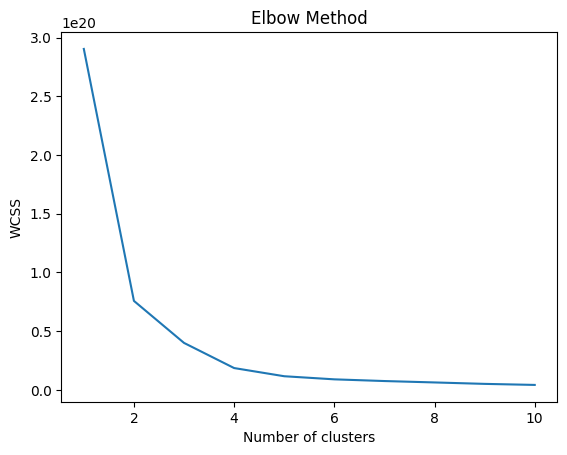

In [83]:
# Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(cluster_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [84]:
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(cluster_data)

# Actionable Insights & Recommendations

* There are 4 cluster in the data
* Learners can be devided on 4 groups based on their job profile